# Weather Data

In this notebook we'll start cleaning the data.

Data comes from [wunderground.com](https://www.wunderground.com/). I got the CapeTown dataset from course materials. It says to use London data but this isn't on there?

## Import Pandas and read in the data

In [2]:
import pandas as pd
print(pd.__version__)

1.4.4


In [3]:
df = pd.read_csv('./CapeTown_CPT_2014.csv')
df.head(1)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213<br />


## Cleaning the Data

The csv file has extra spaces in the header row. There should be no space after commas. When we read in the data, these spaces will be included in the column names.

Look at the output of the cell below for an example of this.

In [4]:
df.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees<br />'],
      dtype='object')

### Clean spaces after commas

We can fix this by passing an argument `skipinitialspace=True` to `read_csv`. NOTE: it won't remove trailing space after the column name.

In [5]:
df = pd.read_csv('./CapeTown_CPT_2014.csv', skipinitialspace=True)
df.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

### Rename Column

There is a `<br />` included in the last column name. Not only is this not supposed to be part of the name, but it also might interpret as a line break.

In [6]:
df = df.rename(columns={'WindDirDegrees<br />':'WindDirDegrees'})
df.columns

Index(['Date', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

### Remove extra characters from column values

The following code cell is supposed to remove the `<br />` from the data (according to the tutorial), but as you can see, this hasn't worked. This would work to remove trailing white space I suspect. It is not interpreting the html line break as white space but as the literal characters.

The cell after that has another solution which did work.

In [7]:
df['WindDirDegrees'] = df['WindDirDegrees'].str.rstrip(' ')
df['WindDirDegrees'].head()

0    213<br />
1    204<br />
2    193<br />
3    314<br />
4     25<br />
Name: WindDirDegrees, dtype: object

In [8]:
df['WindDirDegrees'] = df['WindDirDegrees'].str.replace('<br />', '')
df['WindDirDegrees'].head()

0    213
1    204
2    193
3    314
4     25
Name: WindDirDegrees, dtype: object

### Missing values

Missing values, also known as null values, are one of the reasons to clean data. The following cell will show where the null values are in the given column, True means the value is missing.

In [9]:
df['Events'].isnull()

0       True
1       True
2       True
3       True
4      False
       ...  
360     True
361     True
362     True
363     True
364     True
Name: Events, Length: 365, dtype: bool

We can use this pandas series of boolean values to filter only rows that contain a null value in the given column. We can see that the filtered data contains less rows so we know it has worked.

In [10]:
null_series = df['Events'].isnull()
print(null_series)

df[null_series]

0       True
1       True
2       True
3       True
4      False
       ...  
360     True
361     True
362     True
363     True
364     True
Name: Events, Length: 365, dtype: bool


,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213
1,2014-1-2,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204
2,2014-1-3,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193
3,2014-1-4,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314
10,2014-1-11,23,19,15,13,12,11,82,61,43,...,31.0,15.0,10.0,34,19,NaN,0.0,1.0,NaN,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2014-12-27,24,20,15,15,13,10,77,61,44,...,31.0,15.0,10.0,48,27,NaN,0.0,1.0,NaN,163
361,2014-12-28,28,21,15,15,14,12,82,57,33,...,31.0,13.0,10.0,35,26,NaN,0.0,1.0,NaN,169
362,2014-12-29,29,24,18,17,15,14,78,59,36,...,31.0,14.0,10.0,34,19,NaN,0.0,1.0,NaN,183
363,2014-12-30,27,23,19,17,16,15,78,60,44,...,31.0,15.0,10.0,42,31,48.0,0.0,1.0,NaN,165


### What to do with missing values

We must decide what to do with our missing values. We have three choices

- ignore rows that contain missing values `df.dropna()`
- replace with a fixed value `df.fillna('')` in this case an empty string
- replace with a computed value like the mean (that would only work for numeric values)

NOTE: pandas will ignore null values when computing numeric statistics so you don't have to remove missing values before applying `sum()`, `median()`, etc.

In [11]:
df_no_null_values = df.dropna()
print(f"Total rows in data: {len(df)}")
print(f"Total rows with no missing values: {len(df)}")

Total rows in data: 365
Total rows with no missing values: 365


### Changing value types (`dtypes`) of columns

When reading in data, pandas might sometimes wrongly interpret the data type of the values in a column. You can view dtypes of each column with `df.dtypes`.

- `int64` is the pandas data type for whole numbers such as 55 or 2356
- `float64` is the pandas data type for decimal numbers such as 55.25 or 2356.00
- `object` is the pandas data type for strings such as 'hello world' or 'rain' 

In [12]:
df.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

The dtypes are mostly okay except for `Date` and `WindDirDegrees` which are currently `object` type but shouldn't be. 

WindDirDegrees was interpreted as strings because of the `<br />` that was suffixed to each line of the csv file before we cleaned it. We want it to be a number so we can make queries such as 'display rows where the wind direction is greater than 350 degrees'.

Lets change it to an `int64`.

In [13]:
df['WindDirDegrees'] = df['WindDirDegrees'].astype('int64')
query = df[df['WindDirDegrees'] > 350]
print(f"Total rows where wind direction is greater than 350 degrees: {len(query)}")

Total rows where wind direction is greater than 350 degrees: 19


### Exercise

#### Q1. Select all days that had a northerly wind. Hint: select the rows where the direction is greater than or equal to 350 or smaller than or equal to 10, as the compass rose shows.

In [48]:
northerly_wind = df[(df['WindDirDegrees'] >= 350) | (df['WindDirDegrees'] <= 10)]
print(f"There were {len(northerly_wind)} days where there was a northerly wind.")


There were 35 days where there was a northerly wind.


#### Q2. Write two lines of code to display the first five rows that have a missing value in the `'Max Gust SpeedKm/h'` column. Hint: first select the missing value rows and store them in a new dataframe, then display the first five rows of the new dataframe.

In [56]:
null_rows_in_gust_col = df['Max Gust SpeedKm/h'].isna()
df[null_rows_in_gust_col].head()
# .iloc[0:5] could alternatively be used

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213
2014-01-02,2014-01-02,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193
2014-01-04,2014-01-04,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314
2014-01-05,2014-01-05,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25


### Now lets change the Date column to `datetime64` then check if it worked.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes[0:1]

Date    datetime64[ns]
dtype: object

### How to make queries on datatime64 values

We can't use a string to query datetime, eg. `df['Date'] == '2014-1-3'` won't work. We have to use `datetime(year, month, day_of_month)`. We must import this function to use it.

In [15]:
from datetime import datetime

df[df['Date'] == datetime(2014, 6, 4)]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
154,2014-06-04,15,12,10,12,8,3,88,71,49,...,19.0,10.0,3.0,48,35,61.0,6.1,6.0,Rain,299


## Visualize Data

Tell matplotlib to display plots inside the notebook immediately after each call to `plot()` by running `%matplotlib inline`. If you do this, you don't need to import matplotlib to use it. This is a feature of a jupyter notebook when using python outside of a notebook.

In [16]:
%matplotlib inline

<AxesSubplot:>

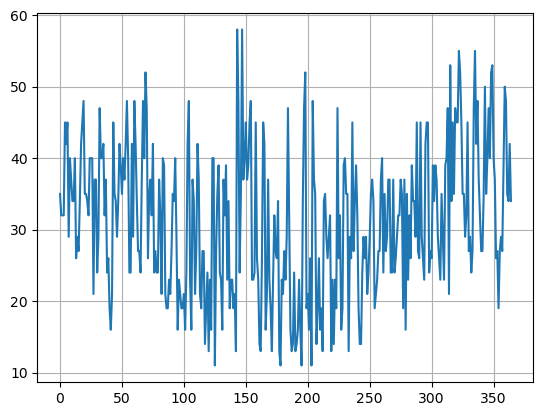

In [17]:
df['Max Wind SpeedKm/h'].plot(grid=True)

### Exercise

Write code to plot the minimum, mean, and maximum temperature during 2014

<AxesSubplot:>

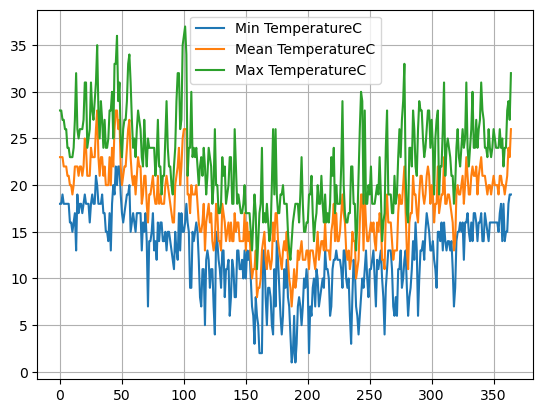

In [18]:
# write solution
df[['Min TemperatureC', 'Mean TemperatureC', 'Max TemperatureC']].plot(grid=True)

## Change Index Column

By default pandas uses 0 integers starting from 0 as the index column. You can change this to one of the other columns. 

In [19]:
df.index = df['Date']
df.sort_index() # put the index in order if needed
df.head(3)

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213
2014-01-02,2014-01-02,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193


### Select row using index column

The value must match the dtype of the column. In the example below `datetime` is used to make the value datetime64.

In [22]:
# df.loc[datetime(2014, 1, 3)] # slect single row
df.loc[datetime(2014, 1, 3) : datetime(2014, 1, 8)] # select range

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.00,4.0,NaN,193
2014-01-04,2014-01-04,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.00,3.0,NaN,314
2014-01-05,2014-01-05,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.00,4.0,Rain,25
2014-01-06,2014-01-06,26,22,18,19,16,14,94,78,61,...,26.0,11.0,4.0,42,18,NaN,6.10,6.0,Rain,171
2014-01-07,2014-01-07,24,21,18,18,17,16,88,77,59,...,31.0,12.0,10.0,45,29,NaN,2.03,4.0,Rain,162
2014-01-08,2014-01-08,24,21,18,18,17,16,94,82,62,...,19.0,10.0,0.0,29,16,47.0,0.00,5.0,Fog-Rain,295


Now that we used Date to index our data we can see it in the plot.

Text(0, 0.5, 'Max Wind Speed (Km/h)')

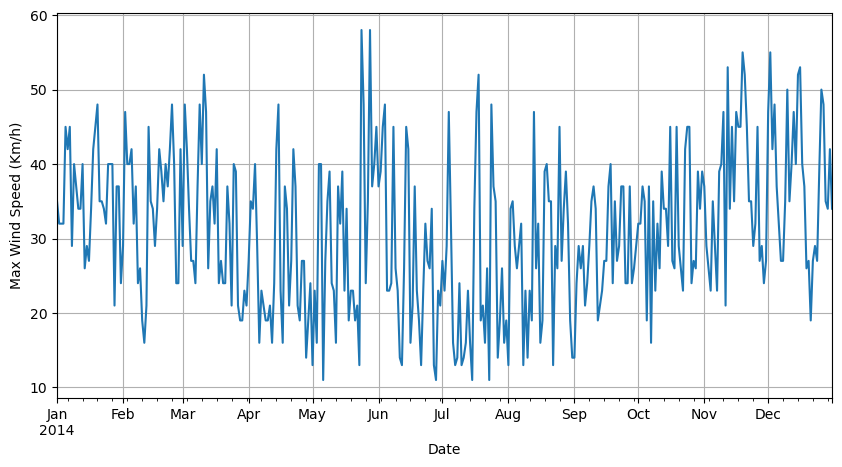

In [28]:
df['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10, 5)).set_ylabel('Max Wind Speed (Km/h)')

### Exercise 

Plot the values of `'Mean Humidity'` during spring (full months of March, April and May)

Text(0, 0.5, 'Mean Humidity %')

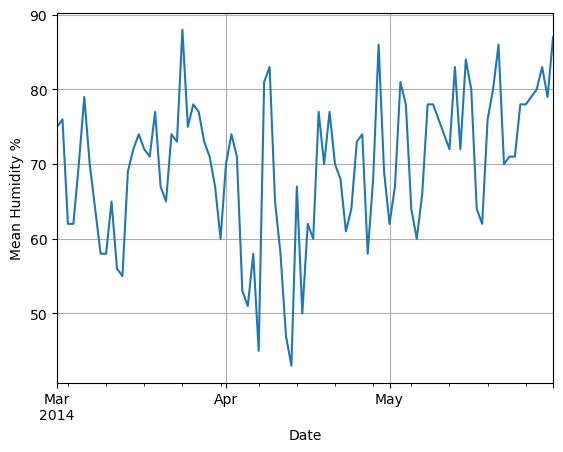

In [39]:
mean_hum_mar_to_may = df['Mean Humidity'].loc[datetime(2014, 3, 1) : datetime(2014, 5, 31)]
mean_hum_mar_to_may.plot(grid=True).set_ylabel('Mean Humidity %')
